 Author: RAJAT HANDA

In [36]:
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Train Dataset

In [144]:
df_train=pd.read_csv('Pr_train_20.csv',parse_dates=['PERIOD (FORMATTED)'],index_col='PERIOD (FORMATTED)',
                 infer_datetime_format=True, encoding='utf-8')

In [38]:
df_train.head(20)

,IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,RSI_12M.1,...,CASH_P.1,EV.1,RVM_CFO_AST.1,VALUE_COM.1,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2015-08-07,B66Y3W,0.000710,-0.001156,-0.000904,0.001082,1.567468e-05,-0.004091,-0.288839,-0.002757,-0.115162,...,-0.002576,0.000341,0.012645,-0.009822,-0.019840,0.014736,-0.147384,-0.244777,-21.837562,-25.108537
2015-08-14,46625H10,-0.457558,-0.000262,0.039349,0.018936,1.870140e-04,0.019779,-0.036314,0.000010,0.031485,...,0.032568,0.016625,0.003394,0.021311,-0.001720,0.005954,0.041049,0.068354,-11.073070,-14.344045
2015-08-14,22531010,-0.437356,-0.001977,-0.001736,0.130047,2.003967e-04,0.013598,0.236413,0.004571,0.058348,...,-0.001472,-0.001722,-0.007786,-0.100819,0.001062,0.059482,-0.050510,-0.436697,-13.421253,-16.692228
2015-08-14,68193610,0.037392,0.000447,-0.001328,-0.354802,2.484239e-04,0.019990,0.256615,-0.000507,-0.014272,...,-0.001069,-0.001453,0.003451,0.002316,-0.004681,0.011318,-0.024707,-0.315484,-9.963345,-13.234320
2015-08-14,05348410,-0.417154,0.000501,0.001474,0.018936,3.322702e-04,0.005642,0.377827,-0.000229,0.030606,...,-0.002477,0.000800,-0.047704,-0.052720,-0.002440,0.020004,0.103849,-0.396293,-1.768926,-5.039901
2015-08-14,89102710,0.370725,0.000484,-0.001142,0.140148,1.589949e-04,0.005382,-0.086819,-0.000015,0.038316,...,-0.002414,-0.001401,-0.012496,-0.046897,-0.005309,-0.042108,0.131336,-0.335687,-12.636620,-15.907595
2015-08-14,G0538410,-0.366649,0.000009,-0.001945,0.231057,1.369016e-04,0.004044,0.256615,0.000103,0.042583,...,0.003591,-0.002119,0.022075,0.047071,-0.004768,0.007796,0.109461,0.229970,-5.392187,-8.663162
2015-08-14,BHWQZW,0.239412,-0.000891,-0.001996,0.018936,-5.307079e-08,-0.007262,-0.056516,-0.000901,-0.056039,...,-0.001813,-0.002037,-0.002349,-0.052663,0.061409,-0.002443,-0.038427,-0.497303,8.134266,4.863291
2015-08-14,013670,-0.023214,0.000373,-0.000135,-0.314398,4.352641e-05,0.012832,-0.076718,0.000885,0.020416,...,-0.002576,-0.000898,-0.038901,-0.014430,0.021265,0.007070,0.150514,-0.295282,-21.332839,-24.603814


#### Gaussian Distribution

In [28]:
df_2015=df_train[df_train.index.year==2015]

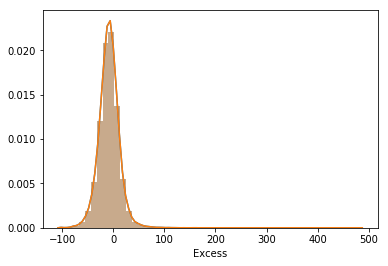

In [30]:
hist_2012 = sns.distplot(df_2015['Excess'])
plt.show()

#### Cols to Use

In [149]:
cols_to_not_use = {'Excess','FUTURE 24 WEEK RETURNS', 'IDENTIFIER', 'PERIOD (FORMATTED)'}
cols_to_use = list(filter(lambda c: c not in cols_to_not_use, df_train.columns))

## Predict Variable

In [200]:
id = 22531010 #val_set.id.sample().values[0]
print(id)
temp = df_train[df_train.IDENTIFIER	==id]
temp

22531010


,PERIOD (FORMATTED),IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,...,RVM_CFO_AST.1,VALUE_COM.1,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess,Excess_Lag_1,Diff_Lag_1
2,2015-08-14,22531010.0,-0.437356,-0.001977,-0.001736,0.130047,0.000200,0.013598,0.236413,0.004571,...,-0.007786,-0.100819,0.001062,0.059482,-0.050510,-0.436697,-13.421253,-16.692228,-25.132933,8.440705
84832,2015-07-10,22531010.0,-0.407053,0.001347,-0.001585,0.140148,0.000198,0.014401,0.246514,0.003135,...,-0.014416,-0.116544,0.002042,0.058500,0.113936,-0.426596,-12.578411,-15.849386,-23.391413,NaN
84913,2015-08-28,22531010.0,-0.417154,-0.001516,-0.001767,0.130047,0.000202,0.014056,0.206110,0.003345,...,-0.007701,-0.099378,0.002717,0.056175,-0.016418,-0.456899,-10.901476,-14.172451,-12.562089,-1.610362
174682,2016-02-05,22531010.0,-0.265638,-0.002078,-0.001858,0.079542,0.000320,0.019062,0.327322,0.001511,...,0.001121,-0.048059,0.009444,0.079178,0.037977,-0.426596,10.710902,7.439927,7.373318,0.066610
202337,2015-07-17,22531010.0,-0.427255,0.000303,-0.001643,0.140148,0.000191,0.013662,0.165706,0.003582,...,-0.011039,-0.111778,0.001978,0.063032,0.034770,-0.436697,-8.405930,-11.676905,-15.849386,4.172481
245938,2015-09-25,22531010.0,-0.235335,0.000817,-0.001737,0.109845,0.000200,0.016742,0.175807,0.001789,...,-0.009518,-0.096540,0.003773,0.053764,-0.033767,-0.436697,-1.446291,-4.717266,-1.366827,-3.350439
258937,2016-01-29,22531010.0,-0.053517,-0.001645,-0.001831,0.089643,0.000154,0.019129,0.014191,0.001473,...,0.002088,-0.049970,0.009065,0.079052,0.025295,-0.426596,10.644293,7.373318,-1.176903,8.550221
303837,2015-09-11,22531010.0,-0.386851,-0.000977,-0.001751,0.109845,0.000204,0.016964,0.185908,0.003026,...,-0.004734,-0.093647,0.004077,0.055733,0.000268,-0.436697,-2.536184,-5.807159,-3.924853,-1.882305
303968,2015-11-27,22531010.0,-0.316144,-0.000643,-0.001756,0.079542,0.000146,0.015692,0.165706,0.002521,...,-0.001884,-0.073323,0.000415,0.087134,-0.041602,-0.446798,-12.713724,-15.984699,5.921770,-21.906469
330602,2015-08-21,22531010.0,-0.407053,-0.001807,-0.001783,0.130047,0.000201,0.014023,0.216211,0.003577,...,-0.005219,-0.094464,0.002383,0.059051,-0.033653,-0.446798,-9.291114,-12.562089,-16.692228,4.130139


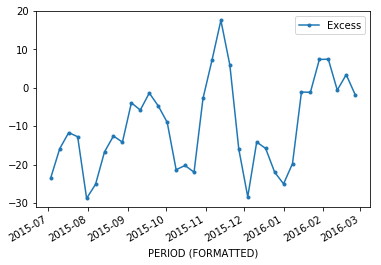

In [43]:
temp[['Excess']].iloc[:,:].plot(marker='.')

## Adding More features

In [145]:
df_train=df_train.reset_index()
df_train.columns

Index(['PERIOD (FORMATTED)', 'IDENTIFIER', 'RANK', '1M_RET', 'MCAP',
       '1SS_ERNQLT', 'IST_SURPY1', 'ACCX', 'ARM_PFD_COMP', 'RET24M_L1M',
       'RSI_12M.1', 'MIN12M.1', 'CASH_P.1', 'EV.1', 'RVM_CFO_AST.1',
       'VALUE_COM.1', 'QUALITY.1', 'RISK', 'TECHNICAL1.1', 'PP_RANK',
       'FUTURE 24 WEEK RETURNS', 'Excess'],
      dtype='object')

### Creating Lag Variable with Shift = 1

In [146]:
df_train['Excess_Lag_1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['Excess'].shift(1)

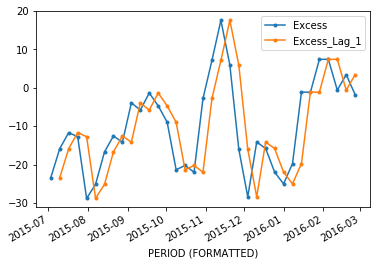

In [86]:
# Validating our query
temp[['Excess','Excess_Lag_1']].iloc[:100,:].plot(marker='.')

### Lag and Actual Difference

In [196]:
df_train['Diff_Lag_1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['Excess'].diff()

In [198]:
df_train

,PERIOD (FORMATTED),IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,...,RVM_CFO_AST.1,VALUE_COM.1,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess,Excess_Lag_1,Diff_Lag_1
0,2015-08-07,NaN,0.000710,-0.001156,-0.000904,0.001082,1.567468e-05,-0.004091,-0.288839,-0.002757,...,0.012645,-0.009822,-0.019840,0.014736,-0.147384,-0.244777,-21.837562,-25.108537,-30.902019,NaN
1,2015-08-14,NaN,-0.457558,-0.000262,0.039349,0.018936,1.870140e-04,0.019779,-0.036314,0.000010,...,0.003394,0.021311,-0.001720,0.005954,0.041049,0.068354,-11.073070,-14.344045,-18.304366,NaN
2,2015-08-14,22531010.0,-0.437356,-0.001977,-0.001736,0.130047,2.003967e-04,0.013598,0.236413,0.004571,...,-0.007786,-0.100819,0.001062,0.059482,-0.050510,-0.436697,-13.421253,-16.692228,-25.132933,8.440705
3,2015-08-14,68193610.0,0.037392,0.000447,-0.001328,-0.354802,2.484239e-04,0.019990,0.256615,-0.000507,...,0.003451,0.002316,-0.004681,0.011318,-0.024707,-0.315484,-9.963345,-13.234320,-5.894901,-7.339419
4,2015-08-14,5348410.0,-0.417154,0.000501,0.001474,0.018936,3.322702e-04,0.005642,0.377827,-0.000229,...,-0.047704,-0.052720,-0.002440,0.020004,0.103849,-0.396293,-1.768926,-5.039901,-1.555139,-3.484762
5,2015-08-14,89102710.0,0.370725,0.000484,-0.001142,0.140148,1.589949e-04,0.005382,-0.086819,-0.000015,...,-0.012496,-0.046897,-0.005309,-0.042108,0.131336,-0.335687,-12.636620,-15.907595,-17.162537,1.254942
6,2015-08-14,NaN,-0.366649,0.000009,-0.001945,0.231057,1.369016e-04,0.004044,0.256615,0.000103,...,0.022075,0.047071,-0.004768,0.007796,0.109461,0.229970,-5.392187,-8.663162,-9.290943,NaN
7,2015-08-14,NaN,0.239412,-0.000891,-0.001996,0.018936,-5.307079e-08,-0.007262,-0.056516,-0.000901,...,-0.002349,-0.052663,0.061409,-0.002443,-0.038427,-0.497303,8.134266,4.863291,-7.729052,NaN
8,2015-08-14,13670.0,-0.023214,0.000373,-0.000135,-0.314398,4.352641e-05,0.012832,-0.076718,0.000885,...,-0.038901,-0.014430,0.021265,0.007070,0.150514,-0.295282,-21.332839,-24.603814,-23.981343,-0.622471
9,2015-08-14,567959.0,-0.407053,-0.000081,0.002465,0.001082,7.926633e-05,0.017501,0.478837,0.000305,...,-0.033909,-0.019646,0.027372,0.014503,0.083690,0.199667,-13.944681,-17.215656,-14.057191,-3.158464


In [201]:
temp = df_train[df_train.IDENTIFIER	==id].sort_values(by='PERIOD (FORMATTED)')
temp

,PERIOD (FORMATTED),IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,...,RVM_CFO_AST.1,VALUE_COM.1,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess,Excess_Lag_1,Diff_Lag_1
84832,2015-07-10,22531010.0,-0.407053,0.001347,-0.001585,0.140148,0.000198,0.014401,0.246514,0.003135,...,-0.014416,-0.116544,0.002042,0.058500,0.113936,-0.426596,-12.578411,-15.849386,-23.391413,NaN
202337,2015-07-17,22531010.0,-0.427255,0.000303,-0.001643,0.140148,0.000191,0.013662,0.165706,0.003582,...,-0.011039,-0.111778,0.001978,0.063032,0.034770,-0.436697,-8.405930,-11.676905,-15.849386,4.172481
1076530,2015-07-24,22531010.0,-0.457558,-0.000078,-0.001661,0.140148,0.000207,0.013619,0.246514,0.003891,...,-0.009335,-0.108601,0.002066,0.063606,0.032403,-0.436697,-9.482421,-12.753396,-11.676905,-1.076491
373319,2015-07-31,22531010.0,-0.437356,-0.000345,-0.001621,0.150249,0.000191,0.016246,0.256615,0.004928,...,-0.016409,-0.118615,0.001241,0.059864,0.052601,-0.446798,-25.532354,-28.803329,-12.753396,-16.049933
500476,2015-08-07,22531010.0,-0.427255,-0.001369,-0.001652,0.130047,0.000200,0.015009,0.266716,0.005271,...,-0.015565,-0.109623,0.000990,0.057999,0.030772,-0.436697,-21.861958,-25.132933,-28.803329,3.670396
2,2015-08-14,22531010.0,-0.437356,-0.001977,-0.001736,0.130047,0.000200,0.013598,0.236413,0.004571,...,-0.007786,-0.100819,0.001062,0.059482,-0.050510,-0.436697,-13.421253,-16.692228,-25.132933,8.440705
330602,2015-08-21,22531010.0,-0.407053,-0.001807,-0.001783,0.130047,0.000201,0.014023,0.216211,0.003577,...,-0.005219,-0.094464,0.002383,0.059051,-0.033653,-0.446798,-9.291114,-12.562089,-16.692228,4.130139
84913,2015-08-28,22531010.0,-0.417154,-0.001516,-0.001767,0.130047,0.000202,0.014056,0.206110,0.003345,...,-0.007701,-0.099378,0.002717,0.056175,-0.016418,-0.456899,-10.901476,-14.172451,-12.562089,-1.610362
933320,2015-09-04,22531010.0,-0.386851,-0.002013,-0.001772,0.099744,0.000203,0.017181,0.185908,0.003654,...,-0.003959,-0.095922,0.004079,0.055183,0.023325,-0.446798,-0.653878,-3.924853,-14.172451,10.247597
303837,2015-09-11,22531010.0,-0.386851,-0.000977,-0.001751,0.109845,0.000204,0.016964,0.185908,0.003026,...,-0.004734,-0.093647,0.004077,0.055733,0.000268,-0.436697,-2.536184,-5.807159,-3.924853,-1.882305


In [83]:
df_train=df_train.set_index(['PERIOD (FORMATTED)'])
df_train.columns

Index(['IDENTIFIER', 'RANK', '1M_RET', 'MCAP', '1SS_ERNQLT', 'IST_SURPY1',
       'ACCX', 'ARM_PFD_COMP', 'RET24M_L1M', 'RSI_12M.1', 'MIN12M.1',
       'CASH_P.1', 'EV.1', 'RVM_CFO_AST.1', 'VALUE_COM.1', 'QUALITY.1', 'RISK',
       'TECHNICAL1.1', 'PP_RANK', 'FUTURE 24 WEEK RETURNS', 'Excess',
       'Excess_Lag_1'],
      dtype='object')

## Linear Model

In [150]:
lm_model=lm.LinearRegression()

In [165]:
df_train.isnull().values.any()
df_train.isnull().sum()

PERIOD (FORMATTED)             0
IDENTIFIER                411040
RANK                           0
1M_RET                         0
MCAP                           0
1SS_ERNQLT                     0
IST_SURPY1                     0
ACCX                           0
ARM_PFD_COMP                   0
RET24M_L1M                     0
RSI_12M.1                      0
MIN12M.1                       0
CASH_P.1                       0
EV.1                           0
RVM_CFO_AST.1                  0
VALUE_COM.1                    0
QUALITY.1                      0
RISK                           0
TECHNICAL1.1                   0
PP_RANK                        0
FUTURE 24 WEEK RETURNS         0
Excess                         0
Excess_Lag_1                   0
dtype: int64

In [164]:
df_train=df_train.dropna(subset=['Excess_Lag_1'])

In [157]:
df_train[cols_to_use]

,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,RSI_12M.1,MIN12M.1,CASH_P.1,EV.1,RVM_CFO_AST.1,VALUE_COM.1,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,Excess_Lag_1
0,0.000710,-0.001156,-0.000904,0.001082,1.567468e-05,-0.004091,-0.288839,-0.002757,-0.115162,-0.004266,-0.002576,0.000341,0.012645,-0.009822,-0.019840,0.014736,-0.147384,-0.244777,-30.902019
1,-0.457558,-0.000262,0.039349,0.018936,1.870140e-04,0.019779,-0.036314,0.000010,0.031485,0.000592,0.032568,0.016625,0.003394,0.021311,-0.001720,0.005954,0.041049,0.068354,-18.304366
2,-0.437356,-0.001977,-0.001736,0.130047,2.003967e-04,0.013598,0.236413,0.004571,0.058348,0.010132,-0.001472,-0.001722,-0.007786,-0.100819,0.001062,0.059482,-0.050510,-0.436697,-25.132933
3,0.037392,0.000447,-0.001328,-0.354802,2.484239e-04,0.019990,0.256615,-0.000507,-0.014272,0.005278,-0.001069,-0.001453,0.003451,0.002316,-0.004681,0.011318,-0.024707,-0.315484,-5.894901
4,-0.417154,0.000501,0.001474,0.018936,3.322702e-04,0.005642,0.377827,-0.000229,0.030606,0.011014,-0.002477,0.000800,-0.047704,-0.052720,-0.002440,0.020004,0.103849,-0.396293,-1.555139
5,0.370725,0.000484,-0.001142,0.140148,1.589949e-04,0.005382,-0.086819,-0.000015,0.038316,0.013178,-0.002414,-0.001401,-0.012496,-0.046897,-0.005309,-0.042108,0.131336,-0.335687,-17.162537
6,-0.366649,0.000009,-0.001945,0.231057,1.369016e-04,0.004044,0.256615,0.000103,0.042583,0.027982,0.003591,-0.002119,0.022075,0.047071,-0.004768,0.007796,0.109461,0.229970,-9.290943
7,0.239412,-0.000891,-0.001996,0.018936,-5.307079e-08,-0.007262,-0.056516,-0.000901,-0.056039,0.016805,-0.001813,-0.002037,-0.002349,-0.052663,0.061409,-0.002443,-0.038427,-0.497303,-7.729052
8,-0.023214,0.000373,-0.000135,-0.314398,4.352641e-05,0.012832,-0.076718,0.000885,0.020416,0.016459,-0.002576,-0.000898,-0.038901,-0.014430,0.021265,0.007070,0.150514,-0.295282,-23.981343
9,-0.407053,-0.000081,0.002465,0.001082,7.926633e-05,0.017501,0.478837,0.000305,-0.001343,0.017810,-0.001675,0.001203,-0.033909,-0.019646,0.027372,0.014503,0.083690,0.199667,-14.057191


In [166]:
df_train = df_train.convert_objects(convert_numeric=True)
df_train.dtypes

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


PERIOD (FORMATTED)        datetime64[ns]
IDENTIFIER                       float64
RANK                             float64
1M_RET                           float64
MCAP                             float64
1SS_ERNQLT                       float64
IST_SURPY1                       float64
ACCX                             float64
ARM_PFD_COMP                     float64
RET24M_L1M                       float64
RSI_12M.1                        float64
MIN12M.1                         float64
CASH_P.1                         float64
EV.1                             float64
RVM_CFO_AST.1                    float64
VALUE_COM.1                      float64
QUALITY.1                        float64
RISK                             float64
TECHNICAL1.1                     float64
PP_RANK                          float64
FUTURE 24 WEEK RETURNS           float64
Excess                           float64
Excess_Lag_1                     float64
dtype: object

In [167]:
lm_model.fit(df_train[cols_to_use], df_train['Excess'])

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm_model.intercept_

0.025563112230195442

In [29]:
lm_model.coef_

array([ -5.46112019e-01,  -1.22610048e+03,  -5.71578099e+00,
         2.09968064e+00,   6.09774707e+01,  -3.08410836e+00,
         4.44708780e+00,  -4.78581044e+02,   2.21603743e+01,
         1.01122168e+01,   3.09835435e+01,  -4.26309016e+01,
         5.48573696e+00,   1.78640203e+01,   4.39530419e+00,
        -4.81450718e+00,   6.99491229e+00,  -2.17300092e+00])

## Extra Tree Regressor

In [217]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_train[cols_to_use], df_train['Excess'])

## Ridge

In [188]:
Rid=Ridge()
model3=Rid.fit(df_train[cols_to_use], df_train['Excess'])

## test data

In [169]:
df_test=pd.read_csv('Pr_test_20.csv',parse_dates=['PERIOD (FORMATTED)'],index_col='PERIOD (FORMATTED)',
                 infer_datetime_format=True, encoding='utf-8')

In [174]:
df_test=df_test.reset_index()
df_test['Excess_Lag_1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['Excess'].shift(1)
df_test=df_test.dropna(subset=['Excess_Lag_1'])

## Model Predicitons

### Linear Model

In [175]:
Preds_Excess=lm_model.predict(df_test[cols_to_use])

### Extra Tree

In [218]:
Preds_Excess_2=model2.predict(df_test[cols_to_use])

### Ridge

In [190]:
Preds_Excess_4=model3.predict(df_test[cols_to_use])

### COMBINING EXTRA TREE AND RIDGE

In [67]:
Preds_Excess_3=(model2.predict(df_test[cols_to_use])*0.95)+(model3.predict(df_test[cols_to_use])*0.05)

## Validating Lag_1_ Feature Model

### Linear Model

In [176]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess)

3.9367517959768739

In [177]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess)

73.384922875575029

In [178]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess))

8.5665000365128723

In [179]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess) / df_test['Excess'])) * 100

479.71037693330294

In [180]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess)[0]

0.94878854895695919

### Extra Tree

In [219]:
#MAE Wrong Value
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_2)

8.608754594678798

In [184]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2)

122.17571458560892

In [185]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

11.053312380712351

In [186]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_2) / df_test['Excess'])) * 100


247.89584944216304

In [187]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_2)[0]

0.94083433024986429

### Ridge

In [191]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_4)

3.9535432595442241

In [192]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4)

40.328342989370839

In [193]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

6.3504600612373618

In [194]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_4) / df_test['Excess'])) * 100


486.9445748767813

In [195]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_4)[0]

0.94774828020314961

### Combining EXTRA TREE AND RIDGE

In [68]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_3)

13.742653583970375

In [69]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_3)

358.08081137131251

In [70]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_3))

18.923023314769566

In [71]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_3) / df_test['Excess'])) * 100

201.64155498760036

In [72]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_3)[0]

0.048840642670072806

## Lag And Difference

In [204]:
df_train.isnull().values.any()
df_train.isnull().sum()

PERIOD (FORMATTED)        0
IDENTIFIER                0
RANK                      0
1M_RET                    0
MCAP                      0
1SS_ERNQLT                0
IST_SURPY1                0
ACCX                      0
ARM_PFD_COMP              0
RET24M_L1M                0
RSI_12M.1                 0
MIN12M.1                  0
CASH_P.1                  0
EV.1                      0
RVM_CFO_AST.1             0
VALUE_COM.1               0
QUALITY.1                 0
RISK                      0
TECHNICAL1.1              0
PP_RANK                   0
FUTURE 24 WEEK RETURNS    0
Excess                    0
Excess_Lag_1              0
Diff_Lag_1                0
dtype: int64

In [203]:
df_train=df_train.dropna(subset=['Diff_Lag_1'])

In [205]:
cols_to_not_use = {'Excess','FUTURE 24 WEEK RETURNS', 'IDENTIFIER', 'PERIOD (FORMATTED)'}
cols_to_use = list(filter(lambda c: c not in cols_to_not_use, df_train.columns))

In [208]:
df_test=df_test.reset_index()
df_test['Diff_Lag_1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['Excess'].diff()
df_test=df_test.dropna(subset=['Diff_Lag_1'])

### Linear Model

In [206]:
lm_model=lm.LinearRegression()
lm_model.fit(df_train[cols_to_use], df_train['Excess'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [209]:
Preds_Excess=lm_model.predict(df_test[cols_to_use])

In [210]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess)

1.1823061303663301e-13

In [211]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess)

3.5639037197022348e-26

In [212]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess))

1.8878304266279412e-13

In [213]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess) / df_test['Excess'])) * 100

4.8848318093221697e-12

In [214]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess)[0]

0.99999999999514533

### Extra Tree

In [220]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_train[cols_to_use], df_train['Excess'])

In [221]:
Preds_Excess_2=model2.predict(df_test[cols_to_use])

In [222]:
#MAE 
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_2)

8.608754594678798

In [223]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2)

124.94116617165599

In [224]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

11.177708449036233

In [225]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_2) / df_test['Excess'])) * 100

215.42362784366978

In [226]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_2)[0]

0.95531916384590687

### Ridge

In [227]:
Rid=Ridge()
model3=Rid.fit(df_train[cols_to_use], df_train['Excess'])

In [228]:
Preds_Excess_4=model3.predict(df_test[cols_to_use])

In [229]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_4)

1.6467961348406577e-07

In [230]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4)

6.0242851990206937e-14

In [231]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

2.4544419322975829e-07

In [232]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_4) / df_test['Excess'])) * 100

1.8419074993226812e-05

In [233]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_4)[0]

0.99999999999513445

## Adding more features

In [236]:
df_train['Abs_Diff_Lag_1']=abs(df_train['Diff_Lag_1'])
df_test['Abs_Diff_Lag_1']=abs(df_test['Diff_Lag_1'])
df_train['Sum_Lag'] = df_train.apply(lambda row: row['Excess'] + row['Excess_Lag_1'], axis=1)
df_test['Sum_Lag'] = df_test.apply(lambda row: row['Excess'] + row['Excess_Lag_1'], axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [250]:
del df_train['MCAP_Mean']
df_train.head()

,PERIOD (FORMATTED),IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,...,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess,Excess_Lag_1,Diff_Lag_1,Abs_Diff_Lag_1,Sum_Lag
2,2015-08-14,22531010.0,-0.437356,-0.001977,-0.001736,0.130047,0.000200,0.013598,0.236413,0.004571,...,0.001062,0.059482,-0.050510,-0.436697,-13.421253,-16.692228,-25.132933,8.440705,8.440705,-41.825161
3,2015-08-14,68193610.0,0.037392,0.000447,-0.001328,-0.354802,0.000248,0.019990,0.256615,-0.000507,...,-0.004681,0.011318,-0.024707,-0.315484,-9.963345,-13.234320,-5.894901,-7.339419,7.339419,-19.129222
4,2015-08-14,5348410.0,-0.417154,0.000501,0.001474,0.018936,0.000332,0.005642,0.377827,-0.000229,...,-0.002440,0.020004,0.103849,-0.396293,-1.768926,-5.039901,-1.555139,-3.484762,3.484762,-6.595040
5,2015-08-14,89102710.0,0.370725,0.000484,-0.001142,0.140148,0.000159,0.005382,-0.086819,-0.000015,...,-0.005309,-0.042108,0.131336,-0.335687,-12.636620,-15.907595,-17.162537,1.254942,1.254942,-33.070132
8,2015-08-14,13670.0,-0.023214,0.000373,-0.000135,-0.314398,0.000044,0.012832,-0.076718,0.000885,...,0.021265,0.007070,0.150514,-0.295282,-21.332839,-24.603814,-23.981343,-0.622471,0.622471,-48.585156


In [251]:
df_train.isnull().values.any()
df_train.isnull().sum()

PERIOD (FORMATTED)        0
IDENTIFIER                0
RANK                      0
1M_RET                    0
MCAP                      0
1SS_ERNQLT                0
IST_SURPY1                0
ACCX                      0
ARM_PFD_COMP              0
RET24M_L1M                0
RSI_12M.1                 0
MIN12M.1                  0
CASH_P.1                  0
EV.1                      0
RVM_CFO_AST.1             0
VALUE_COM.1               0
QUALITY.1                 0
RISK                      0
TECHNICAL1.1              0
PP_RANK                   0
FUTURE 24 WEEK RETURNS    0
Excess                    0
Excess_Lag_1              0
Diff_Lag_1                0
Abs_Diff_Lag_1            0
Sum_Lag                   0
dtype: int64

In [256]:
cols_to_not_use = {'Excess','FUTURE 24 WEEK RETURNS', 'IDENTIFIER', 'PERIOD (FORMATTED)'}
cols_to_use = list(filter(lambda c: c not in cols_to_not_use, df_train.columns))

### Linear

In [257]:
lm_model=lm.LinearRegression()
lm_model.fit(df_train[cols_to_use], df_train['Excess'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [258]:
Preds_Excess=lm_model.predict(df_test[cols_to_use])

In [259]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess)

1.7943011209246353e-14

In [260]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess)

5.8714630973408688e-28

In [277]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess))

2.4231102115547425e-14

In [261]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess) / df_test['Excess'])) * 100

1.2311456237526518e-12

In [262]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess)[0]

0.99999999999522748

### Extra Tree

In [263]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_train[cols_to_use], df_train['Excess'])

In [264]:
Preds_Excess_2=model2.predict(df_test[cols_to_use])

In [265]:
#MAE 
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_2)

4.9329100818287186

In [266]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2)

44.664162689172905

In [267]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

6.6831252187261088

In [268]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_2) / df_test['Excess'])) * 100

277.21933722413803

In [269]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_2)[0]

0.97423714916934845

### Ridge

In [270]:
Rid=Ridge()
model3=Rid.fit(df_train[cols_to_use], df_train['Excess'])

In [271]:
Preds_Excess_4=model3.predict(df_test[cols_to_use])

In [272]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_4)

7.496396243345212e-08

In [273]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4)

1.2842982197996926e-14

In [274]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

1.133268820624521e-07

In [275]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_4) / df_test['Excess'])) * 100

9.8956266621703935e-06

In [276]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_4)[0]

0.99999999999513445

In [278]:
print(model2.feature_importances_)

[  1.85976316e-09   2.69425138e-05   3.09666302e-06   1.73932286e-07
   1.92079906e-06   1.62606984e-06   9.79052392e-05   2.34382199e-06
   8.99168069e-06   1.32153616e-04   1.99040405e-05   1.37923482e-05
   4.06909122e-06   8.66270804e-06   4.71045091e-06   1.63737275e-04
   1.61027771e-04   3.90030624e-05   3.75867246e-01   5.27308454e-03
   3.48399958e-03   6.14685607e-01]


In [280]:
imp = pd.DataFrame(index=cols_to_use)
imp['train'] = pd.Series(model2.feature_importances_, index=cols_to_use)

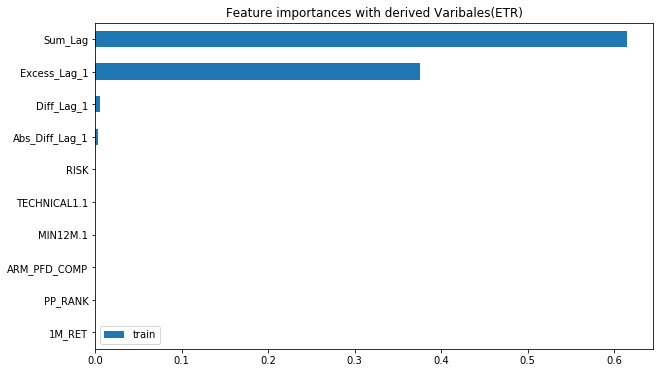

In [286]:
ax = imp.sort_values('train').tail(10).plot.barh(title='Feature importances with derived Varibales(ETR)', figsize=(10,6))

In [287]:
imp_R = pd.DataFrame(index=cols_to_use)
imp_R['train'] = pd.Series(model3.coef_, index=cols_to_use)

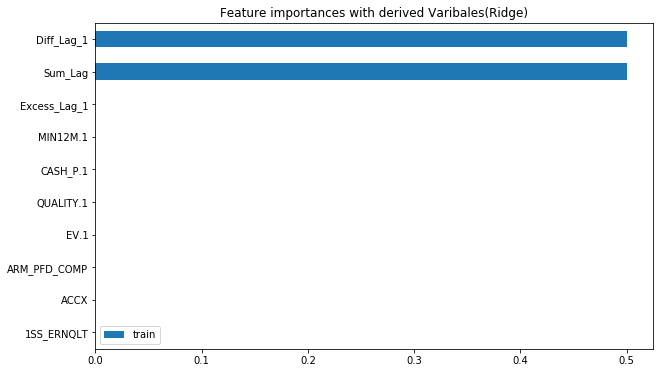

In [288]:
ax = imp_R.sort_values('train').tail(10).plot.barh(title='Feature importances with derived Varibales(Ridge)', figsize=(10,6))

### Combining Ridge and Extra Tree

In [301]:
Preds_Excess_3=(model2.predict(df_test[cols_to_use])*0.05)+(model3.predict(df_test[cols_to_use])*0.95)

In [302]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_3))

0.33415632385166083

In [369]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_3)[0]

0.99996836871611283

## VALIDATION

In [304]:
df_test['Excess_Predicted']=Preds_Excess_3

In [365]:
df_test['Excess_Predicted_Ridge']=Preds_Excess_4

In [314]:
df_test.head()

,level_0,index,PERIOD (FORMATTED),IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,...,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess,Excess_Lag_1,Diff_Lag_1,Abs_Diff_Lag_1,Sum_Lag,Excess_Predicted,Val_P
6,13,13,2016-09-16,59156R10,0.320220,0.000850,0.005573,-0.415408,0.000155,-0.001302,...,-0.009634,0.300677,26.949112,16.586380,11.020517,5.565863,5.565863,27.606897,16.241743,0.344637
7,14,14,2016-09-16,BYT25P,0.118200,-0.000454,-0.001700,-0.445711,-0.000147,-0.023958,...,0.030862,0.128960,-5.154824,-15.517556,-17.693302,2.175747,2.175747,-33.210858,-15.315004,-0.202551
8,15,15,2016-09-16,B3DCF7,0.027291,0.000317,-0.002166,-0.142681,0.000885,-0.011350,...,0.030792,0.290576,-0.799178,-11.161910,-10.828686,-0.333225,0.333225,-21.990596,-10.961331,-0.200579
9,16,16,2016-09-16,BSP5RP,-0.417154,0.000594,-0.001322,-0.162883,0.000437,0.008417,...,0.118206,0.300677,19.263676,8.900944,10.568309,-1.667365,1.667365,19.469253,8.857973,0.042971
10,17,17,2016-09-16,B68N34,-0.487861,-0.000269,-0.002214,-0.395206,0.000213,0.003328,...,0.055336,0.169364,15.705659,5.342927,4.072484,1.270443,1.270443,9.415411,5.280985,0.061942


In [313]:
df_test['Val_P'] = df_test['Excess']-df_test['Excess_Predicted']

In [366]:
df_test['Val_R'] = df_test['Excess']-df_test['Excess_Predicted_Ridge']

In [332]:
df_test


,level_0,index,IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,...,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess,Excess_Lag_1,Diff_Lag_1,Abs_Diff_Lag_1,Sum_Lag,Excess_Predicted,Val_P
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2016-09-16,13,13,59156R10,0.320220,0.000850,0.005573,-0.415408,0.000155,-0.001302,-0.238334,...,-0.009634,0.300677,26.949112,16.586380,11.020517,5.565863,5.565863,27.606897,16.241743,0.344637
2016-09-16,14,14,BYT25P,0.118200,-0.000454,-0.001700,-0.445711,-0.000147,-0.023958,-0.228233,...,0.030862,0.128960,-5.154824,-15.517556,-17.693302,2.175747,2.175747,-33.210858,-15.315004,-0.202551
2016-09-16,15,15,B3DCF7,0.027291,0.000317,-0.002166,-0.142681,0.000885,-0.011350,-0.127223,...,0.030792,0.290576,-0.799178,-11.161910,-10.828686,-0.333225,0.333225,-21.990596,-10.961331,-0.200579
2016-09-16,16,16,BSP5RP,-0.417154,0.000594,-0.001322,-0.162883,0.000437,0.008417,0.236413,...,0.118206,0.300677,19.263676,8.900944,10.568309,-1.667365,1.667365,19.469253,8.857973,0.042971
2016-09-16,17,17,B68N34,-0.487861,-0.000269,-0.002214,-0.395206,0.000213,0.003328,0.084898,...,0.055336,0.169364,15.705659,5.342927,4.072484,1.270443,1.270443,9.415411,5.280985,0.061942
2016-09-23,18,18,33616C10,-0.093921,0.000564,-0.000560,-0.213388,0.000196,0.021886,0.236413,...,0.089324,-0.345788,24.197576,13.834844,17.331778,-3.496933,3.496933,31.166622,13.701501,0.133343
2016-09-23,19,19,614804,0.249513,-0.000204,-0.001464,0.241158,0.000980,-0.015223,0.155605,...,0.104053,-0.143767,-3.489541,-13.852273,-11.635896,-2.216377,2.216377,-25.488169,-13.544285,-0.307988
2016-09-23,20,20,627102,0.471735,-0.000190,-0.000740,0.231057,0.000109,-0.009992,-0.218132,...,-0.093833,0.159263,13.551028,3.188296,7.766226,-4.577929,4.577929,10.954522,3.283571,-0.095274
2016-09-23,21,21,BZ5739,-0.366649,0.000114,0.005551,0.140148,-0.000009,-0.008321,-0.016112,...,0.105470,0.179465,25.580344,15.217612,12.574008,2.643604,2.643604,27.791619,14.955152,0.262460


In [330]:
time_series = pd.DataFrame(df_test['Val_P'])


In [367]:
time_series_R = pd.DataFrame(df_test['Val_R'])


In [333]:
time_series

,Val_P
PERIOD (FORMATTED),
2016-09-16,0.344637
2016-09-16,-0.202551
2016-09-16,-0.200579
2016-09-16,0.042971
2016-09-16,0.061942
2016-09-23,0.133343
2016-09-23,-0.307988
2016-09-23,-0.095274
2016-09-23,0.262460


In [347]:
time_series.index = pd.to_datetime(time_series.index)

In [349]:
time_series['month'] = time_series.index.month

In [356]:
time_series.groupby('PERIOD (FORMATTED)').sum()
del time_series['month']

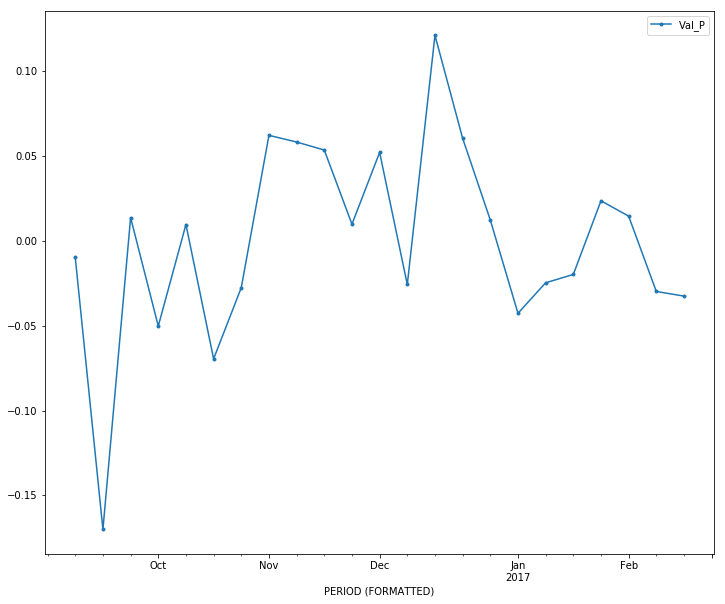

In [364]:
time_series.groupby('PERIOD (FORMATTED)').mean().plot(marker='.')

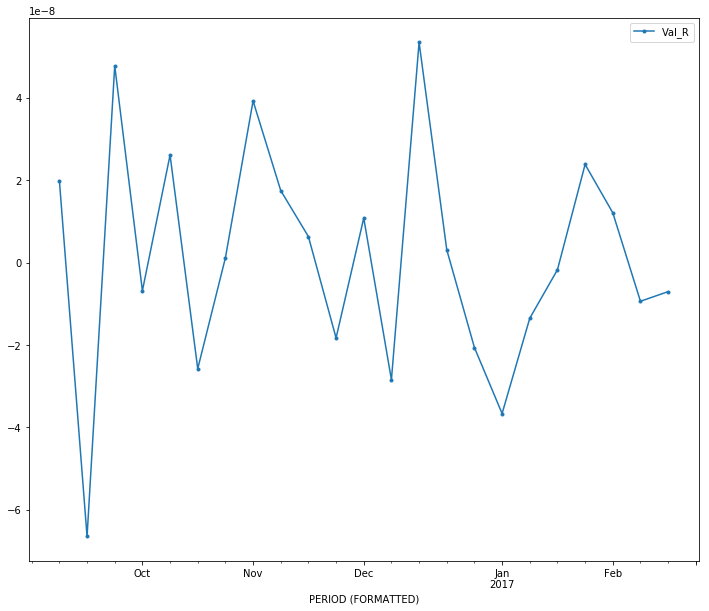

In [368]:
time_series_R.groupby('PERIOD (FORMATTED)').mean().plot(marker='.')

In [363]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
print ("Current size:", fig_size)

Current size: [15.0, 10.0]
Current size: [12, 10]


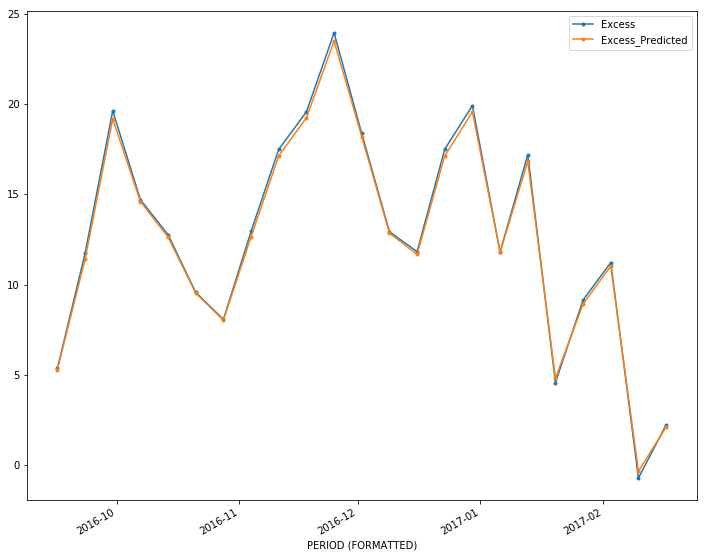

In [377]:
temp1[['Excess','Excess_Predicted']].iloc[:100,:].plot(marker='.')

In [376]:
id = 'B68N34' #val_set.id.sample().values[0]
print(id)
temp1 = df_test[df_test.IDENTIFIER	==id]
temp1

B68N34


,level_0,index,IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,...,FUTURE 24 WEEK RETURNS,Excess,Excess_Lag_1,Diff_Lag_1,Abs_Diff_Lag_1,Sum_Lag,Excess_Predicted,Val_P,Excess_Predicted_Ridge,Val_R
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2016-09-16,17,17,B68N34,-0.487861,-0.000269,-0.002214,-0.395206,0.000213,0.003328,0.084898,...,15.705659,5.342927,4.072484,1.270443,1.270443,9.415411,5.280985,0.061942,5.342927,3.320616e-08
2016-10-28,5305,5305,B68N34,-0.467659,0.000144,-0.002207,-0.395206,0.000207,0.001044,0.155605,...,18.426193,8.063461,9.565964,-1.502503,1.502503,17.629424,8.017567,0.045894,8.063461,-1.157980e-08
2016-11-11,5322,5322,B68N34,-0.417154,-0.000075,-0.002213,-0.405307,0.000170,0.001235,-0.096920,...,27.860102,17.497370,12.942363,4.555007,4.555007,30.439733,17.138525,0.358845,17.497370,9.901569e-08
2016-10-14,10528,10528,B68N34,-0.487861,-0.000196,-0.002216,-0.395206,0.000274,0.001296,0.074797,...,23.126567,12.763835,14.705524,-1.941689,1.941689,27.469359,12.629095,0.134740,12.763835,-2.065431e-08
2017-02-03,10642,10642,B68N34,-0.497962,0.001291,-0.002192,-0.314398,0.000293,0.002677,0.418231,...,21.576956,11.214224,9.148050,2.066174,2.066174,20.362274,11.019490,0.194735,11.214224,6.996485e-08
2017-01-20,13111,13111,B68N34,-0.487861,0.000310,-0.002202,-0.314398,0.000260,0.005943,0.357625,...,14.921790,4.559058,17.202736,-12.643678,12.643678,21.761794,4.802685,-0.243627,4.559058,-2.400852e-07
2016-11-18,13225,13225,B68N34,-0.376750,-0.000325,-0.002214,-0.304297,0.000169,0.002517,-0.086819,...,29.934365,19.571633,17.497370,2.074263,2.074263,37.069004,19.242744,0.328890,19.571633,5.722378e-08
2016-09-30,21106,21106,B68N34,-0.467659,0.000019,-0.002213,-0.395206,0.000173,0.000640,0.044494,...,29.992932,19.630200,11.721881,7.908318,7.908318,31.352081,19.174997,0.455203,19.630200,1.612623e-07
2016-10-07,27070,27070,B68N34,-0.497962,-0.000493,-0.002216,-0.395206,0.000279,0.001225,0.165706,...,25.068256,14.705524,19.630200,-4.924676,4.924676,34.335724,14.601653,0.103871,14.705524,-8.405637e-08


In [385]:
df_test[df_test.Val_P==3.5415585087685031]

,level_0,index,IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,...,FUTURE 24 WEEK RETURNS,Excess,Excess_Lag_1,Diff_Lag_1,Abs_Diff_Lag_1,Sum_Lag,Excess_Predicted,Val_P,Excess_Predicted_Ridge,Val_R
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2016-10-28,39051,39051,296708,0.00071,0.000946,-0.001888,-0.223489,0.000016,-0.029829,0.004289,...,207.963417,197.600685,107.017303,90.583382,90.583382,304.617987,194.059126,3.541559,197.600683,0.000002


In [384]:
df_test.Val_P.max()

3.5415585087685031

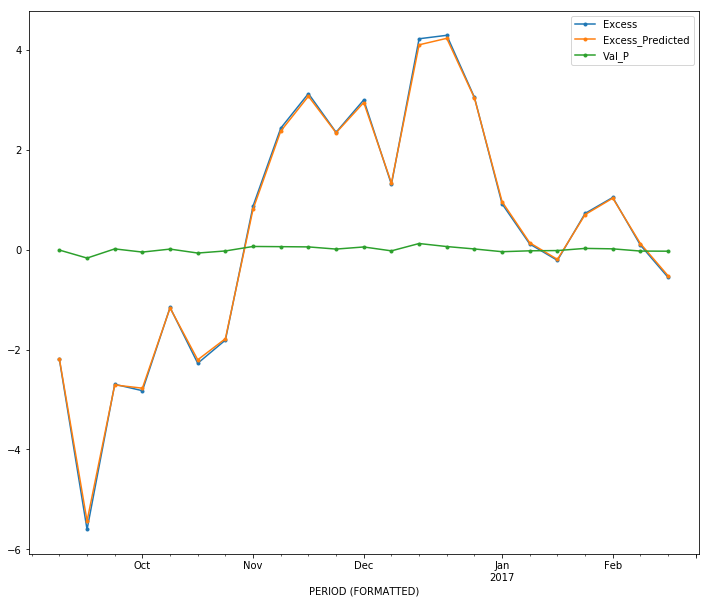

In [388]:
df_test.groupby('PERIOD (FORMATTED)')['Excess','Excess_Predicted','Val_P'].mean().plot(marker='.')